In [1]:
#Importing dependent libraries

import numpy as np
import pandas as pd

In [2]:
#Data Viz libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [3]:
#Reading csv into pandas dataframe

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
#Checking datatypes, column names, total rows, etc.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
#Analyzing descriptive statistics

df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Exploratory Data Analysis

### Heatmap to analyze the correlation betweer variables

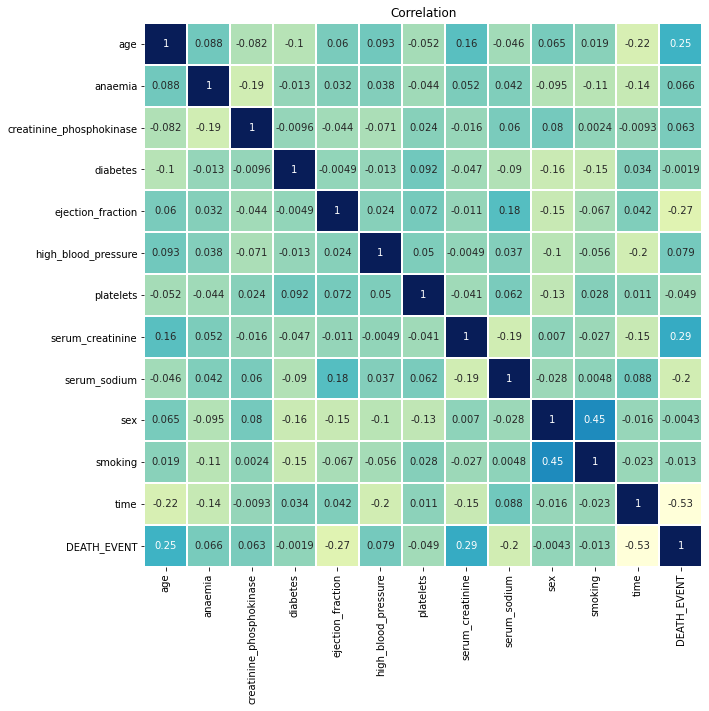

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=1, cmap='YlGnBu', annot=True, cbar=False)
plt.title('Correlation')
plt.show()

### Countplots for binary features

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

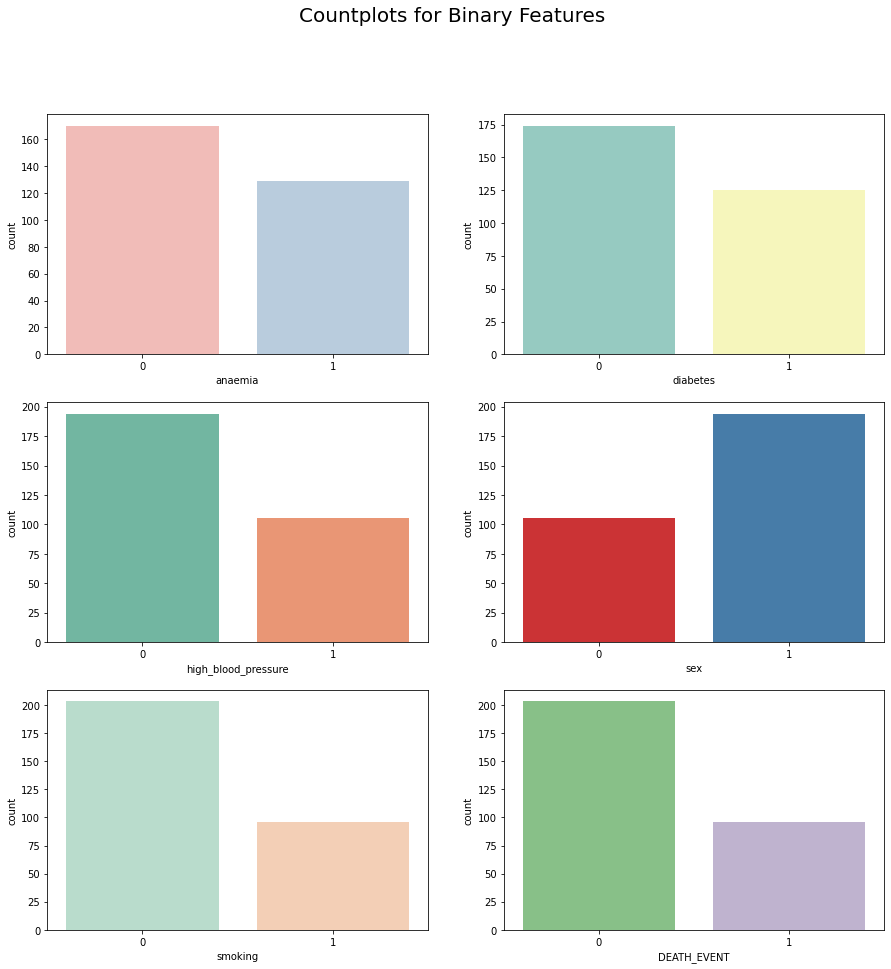

In [23]:
fig, ax = plt.subplots(3,2,figsize=(15,15))
plt.suptitle('Countplots for Binary Features', fontsize=20)

sns.countplot(df['anaemia'], palette='Pastel1', ax=ax[0][0])
sns.countplot(df['diabetes'], palette='Set3', ax=ax[0][1])
sns.countplot(df['high_blood_pressure'], palette='Set2', ax=ax[1][0])
sns.countplot(df['sex'], palette='Set1', ax=ax[1][1])
sns.countplot(df['smoking'], palette='Pastel2', ax=ax[2][0])
sns.countplot(df['DEATH_EVENT'], palette='Accent', ax=ax[2][1])

### Bivariate analysis for continuous features

D:\Ananconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  after removing the cwd from sys.path.


<AxesSubplot:xlabel='age', ylabel='time'>

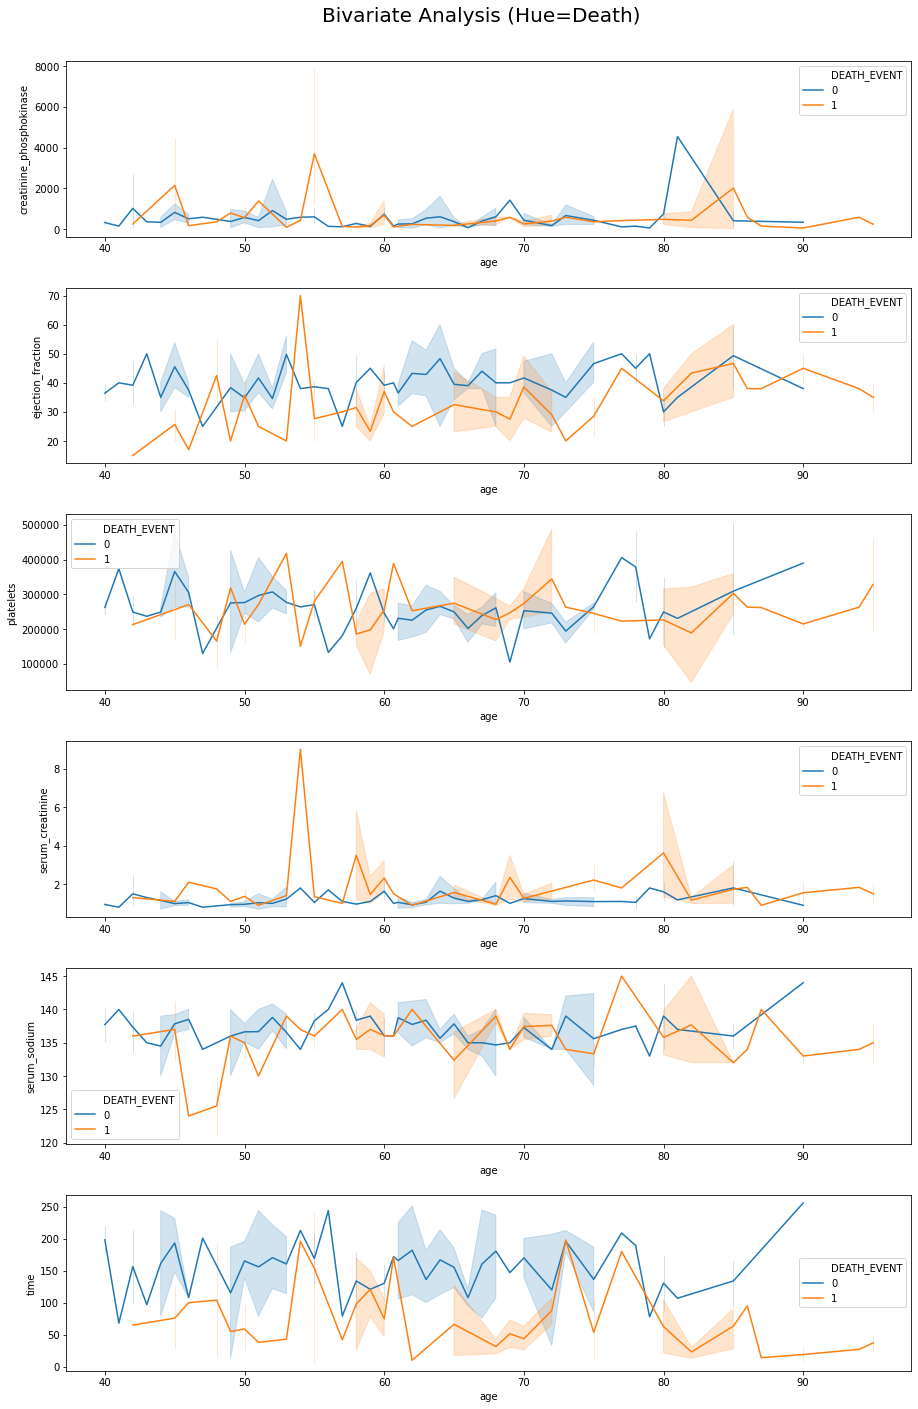

In [26]:
fig, ax = plt.subplots(6,1,figsize=(13,20))

plt.suptitle('Bivariate Analysis (Hue=Death)', fontsize=20)
plt.tight_layout(3)

sns.lineplot(data=df, x='age', y='creatinine_phosphokinase', hue='DEATH_EVENT', ax=ax[0])
sns.lineplot(data=df, x='age', y='ejection_fraction', hue='DEATH_EVENT', ax=ax[1])
sns.lineplot(data=df, x='age', y='platelets', hue='DEATH_EVENT', ax=ax[2])
sns.lineplot(data=df, x='age', y='serum_creatinine', hue='DEATH_EVENT', ax=ax[3])
sns.lineplot(data=df, x='age', y='serum_sodium', hue='DEATH_EVENT', ax=ax[4])
sns.lineplot(data=df, x='age', y='time', hue='DEATH_EVENT', ax=ax[5])